In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to check these)
artists_to_load = "../data/cleaned_artists.csv"
artworks_to_load = "../data/cleaned_artworks.csv"

# Read the City and Ride Data
artists_df = pd.read_csv(artists_to_load)
artworks_df = pd.read_csv(artworks_to_load)

In [2]:
artists_df.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,unknown,0.0
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,unknown,0.0
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,unknown,0.0
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,unknown,0.0


In [3]:
artworks_df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"Austrian, 1841–1918",Austrian,1841,1918,Male,1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjUyNzc3MCJd...,0.0,0.0,0.0,48.6000,0.0,0.0,168.9000,0,0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"French, born 1944",French,1944,0,Male,1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjUyNzM3NCJd...,0.0,0.0,0.0,40.6401,0.0,0.0,29.8451,0,0
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"Austrian, 1876–1957",Austrian,1876,1957,Male,1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjUyNzM3NSJd...,0.0,0.0,0.0,34.3000,0.0,0.0,31.8000,0,0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"French and Swiss, born Switzerland 1944",unknown,1944,0,Male,1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjUyNzQ3NCJd...,0.0,0.0,0.0,50.8000,0.0,0.0,50.8000,0,0
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"Austrian, 1876–1957",Austrian,1876,1957,Male,1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjUyNzQ3NSJd...,0.0,0.0,0.0,38.4000,0.0,0.0,19.1000,0,0


In [4]:
# What percent female in each country per 5 years
artists_df['female_count'] = np.where(artists_df['Gender'] == 'Female', 1, 0)
artists_df.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN,female_count
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,unknown,0.0,0
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,unknown,0.0,0
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,unknown,0.0,0
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0,0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,unknown,0.0,0


In [44]:
# Make percent_female df
percent_female = artists_df.iloc[:, [3,5,9]]
percent_female = percent_female.groupby(['Nationality', 'BeginDate']).mean()
percent_female = percent_female.reset_index()
percent_female

,Nationality,BeginDate,female_count
0,Afghan,1973,1.0
1,Albanian,1964,0.0
2,Albanian,1969,0.0
3,Albanian,1974,0.0
4,Algerian,1922,0.0
...,...,...,...
3085,unknown,2009,0.0
3086,unknown,2010,0.0
3087,unknown,2011,0.0
3088,unknown,2012,0.0


In [45]:
percent_female = percent_female[percent_female.BeginDate != 0]
percent_female = percent_female[percent_female.Nationality != 'unknown']
percent_female

,Nationality,BeginDate,female_count
0,Afghan,1973,1.0
1,Albanian,1964,0.0
2,Albanian,1969,0.0
3,Albanian,1974,0.0
4,Algerian,1922,0.0
...,...,...,...
2954,Zimbabwean,1924,0.0
2955,Zimbabwean,1940,0.0
2956,Zimbabwean,1944,0.0
2957,Zimbabwean,1981,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


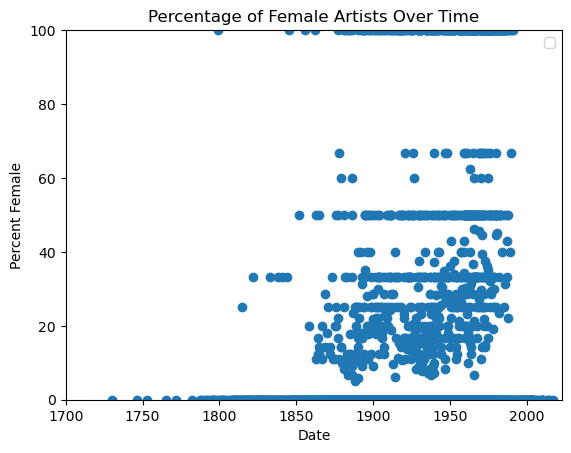

In [46]:
x_axis = percent_female['BeginDate']
y_axis = percent_female['female_count']*100
labels = percent_female['Nationality']

# Create the plot and add a label for the legend.
plt.scatter(x_axis, y_axis)
# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Percent Female")
# Set the y limit between 0 and 100.
plt.ylim(0, 100)
plt.xlim(1700,2023)
# Create a title.
plt.title("Percentage of Female Artists Over Time")
# Add the legend.
plt.legend()
# Show the plot.
plt.show()